# "Image-based Driver Drowsiness Classification using Neural Network"

## Tugas Besar IF5181 - Pengenalan Pola

23521027 - Kadek Denaya Rahadika

23521037 - Krisna Fathurahman

---

## Spesifikasi Soal

1. Gunakanlah dataset klasifikasi yang sudah dieksplorasi, berikanlah deskripsi dari minimal 3 model terbaik yang sudah ada dari studi literatur dalam 3 tahun terakhir untuk dataset tersebut.

2. Tuliskan desain eksperimen, dengan mencantumkan:
a. faktor apa yang diobservasi, variabel response yang digunakan, dan skenario eksperimen yang dilakukan. Teknik learning yang digunakan minimal menggunakan teknik yang dipelajari di kuliah (minimal DTL dan ANN).
b. skema eksperimen (terutama terkait data latih, validasi, dan tes) dan komposisi data sesuai skema tersebut.

3. Tuliskan hasil eksperimen dan analisisnya. Analisis dapat berupa perbandingan antar model, atau memberikan contoh error atau kasus penting yg perlu diobservasi, atau interpretasi hasil eksperimen berbasiskan statistik.

4. Pengumpulan tugas berupa notebook ipynb yang dilengkapi dengan rekap hasil eksperimen pada notebook tersebut.

5. Setiap kelompok akan mempresentasikan hasilnya pada Selasa 30 November 2021 dan Kamis 2 Desember, dan menyiapkan juga dalam bentuk video maksimum selama 10 menit (jika ada problem koneksi nantinya). Tuliskan link video pada bagian akhir notebook.

---

## I. Latar Belakang

Kelompok kami akan menggunakan dataset berupa gambar wajah manusia berlabel *drowsy* atau *not drowsy* pada pranala berikut ini yang didapatkan dari situs kaggle.com. Adapun fitur-fitur yang dapat diambil dari dataset tersebut antara lain:

*   Wajah
*   Orientasi wajah
*   Mata
*   Mulut

Target kelas dari permasalahan ini berupa single-class yang bernilai antara ***drowsy*** atau ***not drowsy***

## II.1. Desain Eksperimen

Dalam eksperimen ini, kami akan membandingkan model lain dengan model utama yang akan dieksplor, yaitu CNN yang kami bangun sendiri.

Dalam mengevaluasi model, kami menggunakan validation set yang sebelumnya sudah kami tetapkan dan dibangun secara random dari training set yang ada.
Berikut merupakan komposisi data yang kami gunakan:
- Training set:
    - 4560 drowsy
    - 4560 not_drowsy
- Validation set:
    - 300 drowsy
    - 300 not_drowsy

Performance measure yang digunakan adalah akurasi.

# II. Percobaan DTL

Dalam bagian ini, kami akan mencoba menggunakan decision tree based learning untuk melakukan pengklasifikasian terhadap dataset.

Pertama-tama, data yang merupakan gambar akan flattening menjadi nilai rgb per pixel nya. Data dibuat menjadi bentuk 32x32 karena keterbatasan storage.
Data dengan besar pixel 128x128 memakan lebih dari 10gb storage ketika diflatten. 

Karena proses flattening lama, hasil flattening akan disimpan dalam dataset.csv agar dapat digunakan lagi nantinya, tanpa mengulangi proses flattening.

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_DIR = '/home/internet/itb/pattern_recognition/training_set'

for cls in os.listdir(IMG_DIR):
    cls_path = os.path.join(IMG_DIR, cls)
    print(cls_path)
    for i, img_file in enumerate(os.listdir(cls_path)):
        if i % 100 == 0:
            print(f"Processing image number: {i}")
        img = load_img(os.path.join(cls_path, img_file), target_size=(32, 32), color_mode="grayscale")
        img_array = (img_to_array(img)).flatten()
        
        img_array = np.append(img_array, 1 if cls == "drowsy" else 0)
        img_array  = img_array.reshape(-1, 1).T
        
        # save it to a csv file
        with open('dataset.csv', 'ab') as f:
            np.savetxt(f, img_array, fmt='%s', delimiter=",")

/home/internet/itb/pattern_recognition/training_set/drowsy
Processing image number: 0
Processing image number: 100
Processing image number: 200
Processing image number: 300
Processing image number: 400
Processing image number: 500
Processing image number: 600
Processing image number: 700
Processing image number: 800
Processing image number: 900
Processing image number: 1000
Processing image number: 1100
Processing image number: 1200
Processing image number: 1300
Processing image number: 1400
Processing image number: 1500
Processing image number: 1600
Processing image number: 1700
Processing image number: 1800
Processing image number: 1900
Processing image number: 2000
Processing image number: 2100
Processing image number: 2200
Processing image number: 2300
Processing image number: 2400
Processing image number: 2500
Processing image number: 2600
Processing image number: 2700
Processing image number: 2800
Processing image number: 2900
Processing image number: 3000
Processing image number

In [4]:
import pandas as pd

df = pd.read_csv("./dataset.csv", header=None)
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,244.0,234.0,219.0,221.0,217.0,219.0,214.0,210.0,208.0,209.0,...,255.0,255.0,255.0,255.0,255.0,255.0,57.0,52.0,53.0,1.0


In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df.iloc[:, :-1]  # Features
y=df.iloc[:, -1].astype(int)  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% validation set

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.893640350877193


Ternyata, penggunaan Random Forest dalam proses pengklasifikasian ini cukup baik, degnan besaran performa akurasi sekitar 89% (berubah-ubah setiap run)

## III. Percobaan Fully Connected 

Di bagian ini, kita akan melihat bagimana hasil NN yang sangat sederhana (fully connected) dalam mengklasifikasi dataset yang sudah dibentuk menjadi csv sebelumnya.

In [15]:
import pandas as pd
import tensorflow
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv("./dataset.csv", header=None)
df.head(1)

df = pd.read_csv("./dataset.csv", header=None)
X=df.iloc[:, :-1]
y=df.iloc[:, -1].astype(int)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% validation set

model = models.Sequential(
  [
    layers.Dense(64, activation="relu", input_dim=1024),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                65600     
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17    

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.7937 - val_loss: 0.3922 - val_accuracy: 0.8110
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.7932 - val_loss: 0.3651 - val_accuracy: 0.8096
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8167 - val_loss: 0.3517 - val_accuracy: 0.8264
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8307 - val_loss: 0.3685 - val_accuracy: 0.8249
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8396 - val_loss: 0.3360 - val_accuracy: 0.8403
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8313 - val_loss: 0.3475 - val_accuracy: 0.8414
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8379 - val_loss: 0.4073 - val_accuracy: 0.7961

<AxesSubplot:>

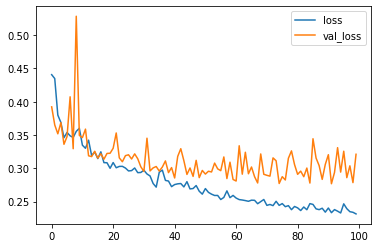

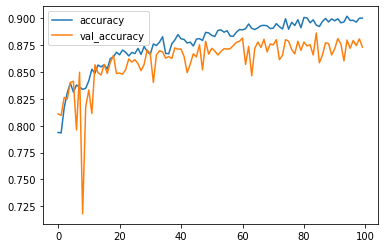

In [17]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
y_pred=model.predict(X_test)
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()
metrics_df[["accuracy","val_accuracy"]].plot()


Dari hasil di atas, kita dapatkan bahwa NN sederhana berbentuk fully connected mampu mengklasifikasi dengan cukup baik, dengan akurasi training data 90% dan validation data 87%

# III. Percobaan Utama -- CNN

### Mencoba menggunakan data yang dibangun menjadi berukuran 64x64x3

In [1]:
import tensorflow
from tensorflow.keras import layers, models
import pandas as pd

2021-11-28 11:55:01.892659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-28 11:55:01.892699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
import tensorflow

training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(64, 64),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(64, 64),
    batch_size=32
)

Found 9120 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [15]:
training_set.class_names

['drowsy', 'not_drowsy']

### Base Model

Berikut merupakan base model yang kami gunakan

In [16]:
from tensorflow.keras import layers, models

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

In [17]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        2336      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0     

In [18]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [19]:
history = model.fit(training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
285/285 [==============================] - 33s 112ms/step - loss: 0.7676 - accuracy: 0.4919 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
285/285 [==============================] - 31s 107ms/step - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
285/285 [==============================] - 34s 117ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
285/285 [==============================] - 33s 113ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
285/285 [==============================] - 32s 110ms/step - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
285/285 [==============================] - 35s 115ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
285/285 [==============================] - 34s 117ms/step - loss: 0.6932 - accuracy: 0.4934 - val_loss: 0.6931 - val_ac

<AxesSubplot:>

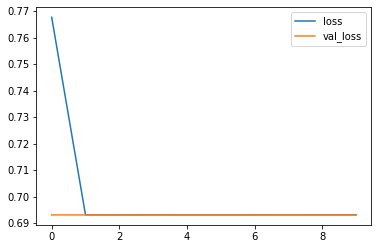

In [20]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()

<AxesSubplot:>

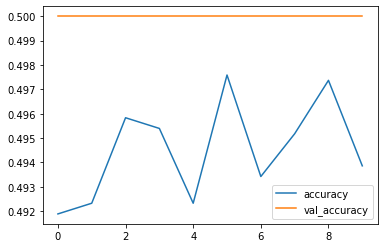

In [21]:
metrics_df[["accuracy","val_accuracy"]].plot()

Model terlihat belum dapat 'melihat' feature map dari dalam training data, diperlihatkan dari tidak adanya perkembangan di tiap epoch nya.

Kita akan mencoba menggunakan pixel yang lebih besar.

### Mencoba menggunakan data yang dibangun menjadi berukuran 200x200x3

Found 9120 files belonging to 2 classes.


2021-11-28 11:55:20.219199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-28 11:55:20.219242: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-28 11:55:20.219260: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-72CTI4N): /proc/driver/nvidia/version does not exist
2021-11-28 11:55:20.219542: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 600 files belonging to 2 classes.
Epoch 1/10
285/285 [==============================] - 120s 416ms/step - loss: 1.7671 - accuracy: 0.7815 - val_loss: 0.4026 - val_accuracy: 0.7933
Epoch 2/10
285/285 [==============================] - 114s 398ms/step - loss: 0.3215 - accuracy: 0.8457 - val_loss: 0.3983 - val_accuracy: 0.7833
Epoch 3/10
285/285 [==============================] - 115s 401ms/step - loss: 0.3063 - accuracy: 0.8557 - val_loss: 0.3547 - val_accuracy: 0.8000
Epoch 4/10
285/285 [==============================] - 115s 402ms/step - loss: 0.2772 - accuracy: 0.8672 - val_loss: 0.3464 - val_accuracy: 0.8200
Epoch 5/10
285/285 [==============================] - 116s 406ms/step - loss: 0.2601 - accuracy: 0.8765 - val_loss: 0.3585 - val_accuracy: 0.8183
Epoch 6/10
285/285 [==============================] - 117s 406ms/step - loss: 0.2506 - accuracy: 0.8827 - val_loss: 0.3401 - val_accuracy: 0.8200
Epoch 7/10
285/285 [==============================] - 114s 399ms/step - loss: 0.2347

<AxesSubplot:>

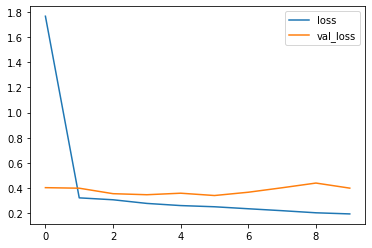

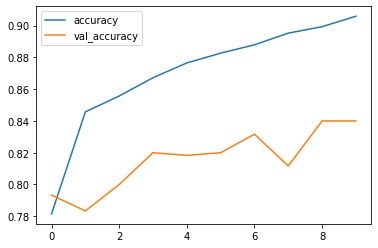

In [2]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)


model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=10)
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()
metrics_df[["accuracy","val_accuracy"]].plot()

Dengan pixel yang lebih besar, terlihat training accuracy sudah meningkat seiring berjalannya training.

Namun, dari hasil ini kita dapat lihat bahwa terjadi fenomena overfitting terhadap validation set (ditunjukkan dari jauhnyaperbedaan akurasi antara training set dan validation set).

### Pencegahan Overfitting

- Menambahkan Dropout Layer untuk mengurangi network complexity
- Menggunakan early stopping callback

Found 9120 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Epoch 1/10
285/285 [==============================] - 120s 417ms/step - loss: 0.8482 - accuracy: 0.7378 - val_loss: 0.4978 - val_accuracy: 0.7800
Epoch 2/10
285/285 [==============================] - 130s 453ms/step - loss: 0.4065 - accuracy: 0.8016 - val_loss: 0.4448 - val_accuracy: 0.8033
Epoch 3/10
285/285 [==============================] - 124s 431ms/step - loss: 0.3620 - accuracy: 0.8252 - val_loss: 0.4101 - val_accuracy: 0.8200
Epoch 4/10
285/285 [==============================] - 119s 411ms/step - loss: 0.3428 - accuracy: 0.8363 - val_loss: 0.4461 - val_accuracy: 0.7900
Epoch 5/10
285/285 [==============================] - 128s 445ms/step - loss: 0.3304 - accuracy: 0.8475 - val_loss: 0.3531 - val_accuracy: 0.8250
Epoch 6/10
285/285 [==============================] - 115s 402ms/step - loss: 0.3208 - accuracy: 0.8571 - val_loss: 0.3757 - val_accuracy: 0.8383
Epoch 7/10
285/285 [=======================

<AxesSubplot:>

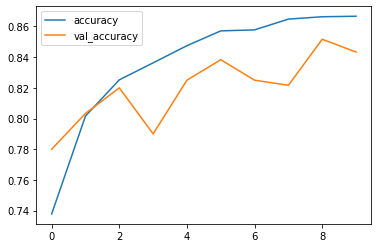

In [21]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)

# add early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
  EarlyStopping(monitor='loss', patience=3),
]

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    # add dropout layers
    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=10, callbacks=callbacks)
metrics_df = pd.DataFrame(history.history)
metrics_df[["accuracy","val_accuracy"]].plot()

Terlihat bahwa overfit sudah bisa dikendalikan.

Perhatikan bahwa tren accuracy masih naik mengikuti besar epoch, berarti sebenarnya nilai accuracy dari training set dan validation set seharusnya bisa lebih baik lagi dengan menaikkan besarnya epoch.